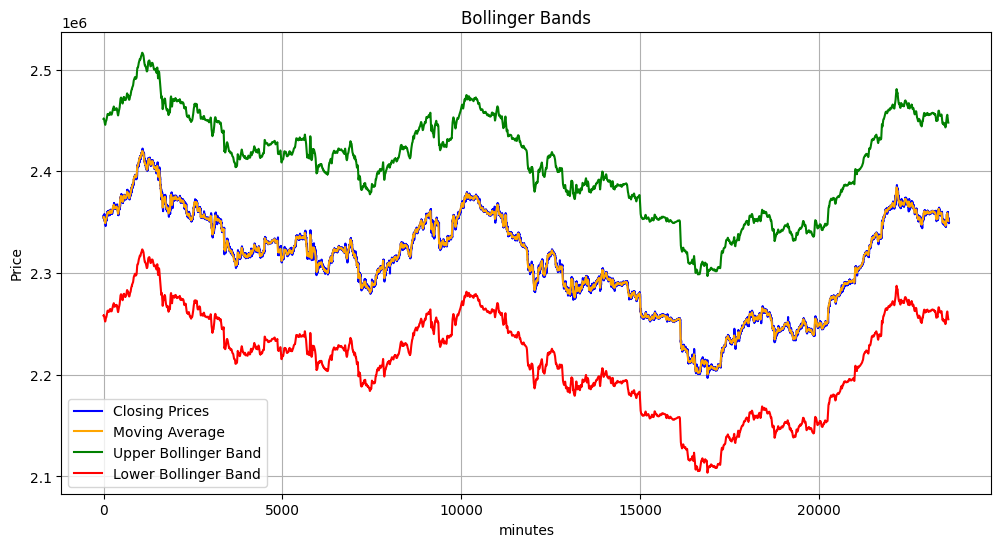

In [1]:
# the data of the stocks of ohlc of last 3 months is present in the file /home/vishi/bolinger/cumul_ohlc.xls
# the data is in the form of DateTime	open	high	low	close	Mean	SD	BB UP Band	BB MID	BB DOWN Band
# datetime is of the form 20241231~09:16:00


import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xlrd


# Read the data from the Excel file
xls_file = '/home/vishi/bolinger/cumul_ohlc.xls'
xls = xlrd.open_workbook(xls_file)
sheet = xls.sheet_by_index(0)
# Extract the data
data = []
for row in range(1, sheet.nrows):
    date = sheet.cell_value(row, 0)
    open_price = sheet.cell_value(row, 1)
    high_price = sheet.cell_value(row, 2)
    low_price = sheet.cell_value(row, 3)
    close_price = sheet.cell_value(row, 4)
    data.append([date, open_price, high_price, low_price, close_price])
# caculate the MVA of average of the last 20 days
def moving_average(data, window):
    return np.convolve(data, np.ones(window), 'valid') / window
# Extract the closing prices
closing_prices = [row[4] for row in data]
# Calculate the moving average
window_size = 20
moving_avg = moving_average(closing_prices, window_size)
# Calculate the upper and lower Bollinger Bands
std_dev = np.std(closing_prices)
upper_band = moving_avg + (std_dev * 2)
lower_band = moving_avg - (std_dev * 2)
# Plot the closing prices and Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='Closing Prices', color='blue')
plt.plot(moving_avg, label='Moving Average', color='orange')
plt.plot(upper_band, label='Upper Bollinger Band', color='green')
plt.plot(lower_band, label='Lower Bollinger Band', color='red')
plt.title('Bollinger Bands')
plt.xlabel('minutes')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# There is a 3 X 3 grid of light bulbs, where each light bulbs are turned on with probability1/2
# Find the probability that no two adjacent (grid cells that share a common side) light bulbs are powered on.

not_valid = [[1,2],[1,4],[2,3],[2,5],[3,6],[4,5],[4,7],[5,6],[5,8],[6,9],[7,8],[8,9]]

configurations = [[]]
def all_configurations(configurations):
    for i in range(1, 10):
        temp_configurations = configurations.copy()
        for configuration in temp_configurations:
            configuration.append(i)
        configurations.extend(temp_configurations)
    return configurations

def is_valid(configuration):
    for i in range(len(configuration)):
        for j in range(i + 1, len(configuration)):
            if [configuration[i], configuration[j]] in not_valid or [configuration[j], configuration[i]] in not_valid:
                return False
    return True

def count_valid_configurations(configurations):
    valid_count = 0
    for configuration in configurations:
        if is_valid(configuration):
            valid_count += 1
    return valid_count

# Generate all configurations
configurations = all_configurations(configurations)
# Count valid configurations
# valid_count = count_valid_configurations(configurations)
configurations
        

In [17]:
configurations = [[]]
def all_configurations(configurations):
    temp_configurations = [] 
    for i in range(1, 10):
        temp_configurations = []
        for configuration in configurations:
            temp_configurations += [configuration + [i]]
        configurations += temp_configurations
    return configurations
        

def is_valid(configuration):
    for i in range(len(configuration)):
        for j in range(i + 1, len(configuration)):
            if [configuration[i], configuration[j]] in not_valid or [configuration[j], configuration[i]] in not_valid:
                return False
    return True

def count_valid_configurations(configurations):
    valid_count = 0
    valid_config = []
    for configuration in configurations:
        if is_valid(configuration):
            valid_count += 1
            valid_config.append(configuration)
    print("Valid configurations:", valid_config)
    return valid_count

# Generate all configurations
configurations = all_configurations(configurations)
# Count valid configurations
valid_count = count_valid_configurations(configurations)
valid_count



Valid configurations: [[], [1], [2], [3], [1, 3], [4], [2, 4], [3, 4], [5], [1, 5], [3, 5], [1, 3, 5], [6], [1, 6], [2, 6], [4, 6], [2, 4, 6], [7], [1, 7], [2, 7], [3, 7], [1, 3, 7], [5, 7], [1, 5, 7], [3, 5, 7], [1, 3, 5, 7], [6, 7], [1, 6, 7], [2, 6, 7], [8], [1, 8], [2, 8], [3, 8], [1, 3, 8], [4, 8], [2, 4, 8], [3, 4, 8], [6, 8], [1, 6, 8], [2, 6, 8], [4, 6, 8], [2, 4, 6, 8], [9], [1, 9], [2, 9], [3, 9], [1, 3, 9], [4, 9], [2, 4, 9], [3, 4, 9], [5, 9], [1, 5, 9], [3, 5, 9], [1, 3, 5, 9], [7, 9], [1, 7, 9], [2, 7, 9], [3, 7, 9], [1, 3, 7, 9], [5, 7, 9], [1, 5, 7, 9], [3, 5, 7, 9], [1, 3, 5, 7, 9]]


63

[2, 3]
